In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
np.random.seed(42)

In [2]:
data=pd.read_csv('HD.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [5]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Score:",model.score(X_test,y_test))
    print('__________________')

<AxesSubplot:>

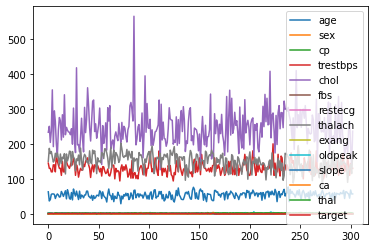

In [6]:
data.plot()

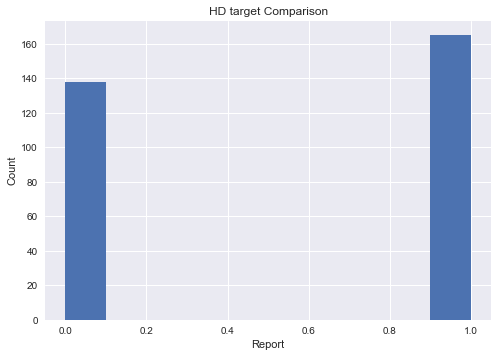

In [7]:
plt.style.use('seaborn')
fig,ax=plt.subplots()
ax.hist(data['target'])
ax.set(title='HD target Comparison',xlabel='Report',ylabel='Count')
plt.show()

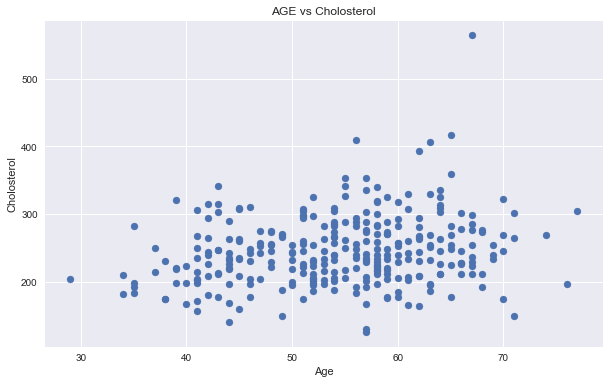

In [8]:
fix,ax=plt.subplots(figsize=(10,6))
ax.scatter(data['age'],data['chol'],cmap='summer')
ax.set(title='AGE vs Cholosterol',xlabel='Age',ylabel='Cholosterol')
plt.show()

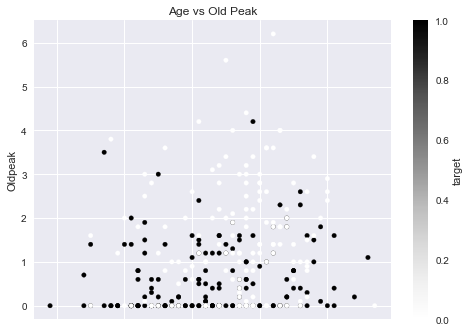

In [9]:
data.plot(x='age',y='oldpeak',c='target',kind='scatter',xlabel='Age',ylabel='Oldpeak',title='Age vs Old Peak');

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


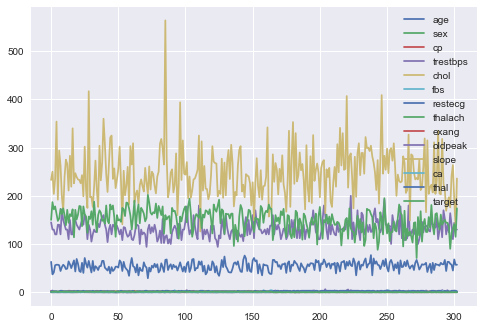

In [11]:
data.plot();

In [12]:
X=data.drop('target',axis=1)
y=data['target']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
run_experiment(model)

R^2 :  0.34267241379310354
MAE : 0.16393442622950818
RMSE: 0.40488816508945796
Score: 0.8360655737704918
__________________


In [16]:
model.score(X_test,y_test)

0.8360655737704918

In [17]:
from sklearn.svm import SVR
model=SVR()

In [18]:
run_experiment(model)

R^2 :  0.2870655060579339
MAE : 0.34861941915878736
RMSE: 0.42166637166334797
Score: 0.2870655060579339
__________________


In [19]:
model.score(X_test,y_test)

0.2870655060579339

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
run_experiment(model)

R^2 :  -0.24892241379310343
MAE : 0.3114754098360656
RMSE: 0.5580998206737443
Score: 0.6885245901639344
__________________


In [21]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
run_experiment(model)

R^2 :  0.40840517241379315
MAE : 0.14754098360655737
RMSE: 0.3841106397986879
Score: 0.8524590163934426
__________________


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
run_experiment(model)

R^2 :  0.07974137931034486
MAE : 0.22950819672131148
RMSE: 0.47907013758040845
Score: 0.7704918032786885
__________________


In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
run_experiment(model)


R^2 :  0.40840517241379315
MAE : 0.14754098360655737
RMSE: 0.3841106397986879
Score: 0.8524590163934426
__________________


In [25]:
for i in range (10,100,10):
    model=RandomForestClassifier(n_estimators=i)
    run_experiment(model)

R^2 :  0.2112068965517242
MAE : 0.19672131147540983
RMSE: 0.4435327625727437
Score: 0.8032786885245902
__________________
R^2 :  0.34267241379310354
MAE : 0.16393442622950818
RMSE: 0.40488816508945796
Score: 0.8360655737704918
__________________
R^2 :  0.40840517241379315
MAE : 0.14754098360655737
RMSE: 0.3841106397986879
Score: 0.8524590163934426
__________________
R^2 :  0.47413793103448276
MAE : 0.13114754098360656
RMSE: 0.3621429841700741
Score: 0.8688524590163934
__________________
R^2 :  0.40840517241379315
MAE : 0.14754098360655737
RMSE: 0.3841106397986879
Score: 0.8524590163934426
__________________
R^2 :  0.40840517241379315
MAE : 0.14754098360655737
RMSE: 0.3841106397986879
Score: 0.8524590163934426
__________________
R^2 :  0.40840517241379315
MAE : 0.14754098360655737
RMSE: 0.3841106397986879
Score: 0.8524590163934426
__________________
R^2 :  0.2769396551724138
MAE : 0.18032786885245902
RMSE: 0.4246502900652006
Score: 0.819672131147541
__________________
R^2 :  0.408405172

In [26]:
model.score(X_test,y_test)

0.8524590163934426

In [27]:
model=RandomForestClassifier(n_estimators=90)
run_experiment(model)

R^2 :  0.47413793103448276
MAE : 0.13114754098360656
RMSE: 0.3621429841700741
Score: 0.8688524590163934
__________________


In [28]:
import pickle
pickle.dump(model,open('ML-Heart-Disease-Exported-Model.pkl','wb'))